In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

#### [Multiple] linear regression on the enrollment data

In [3]:
address = './csv/lynda.com/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.columns = ['year','roll','unem','hgrad','inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


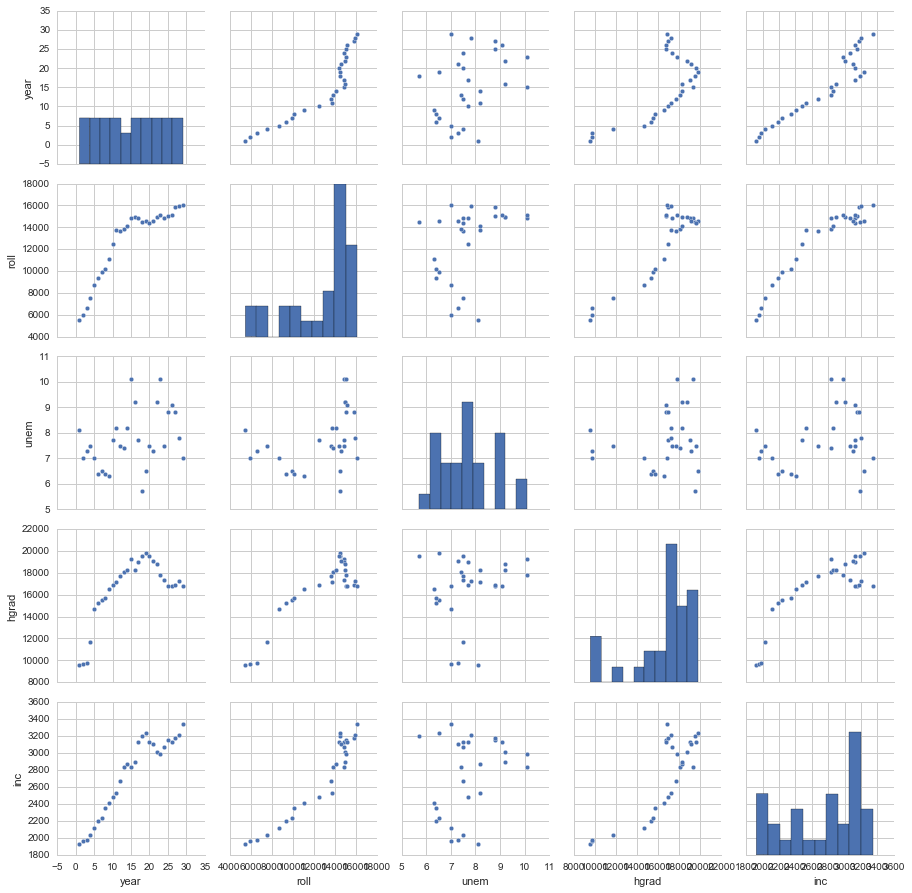

In [4]:
sb.pairplot(enroll)

In [5]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [7]:
enroll_data = enroll.ix[:,(2,3)].values
enroll_target = enroll.ix[:,1].values
enroll_data_names = ['unem','hgrad']

X,y = scale(enroll_data), enroll_target

#### Checking for missing values

In [8]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [ ]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X,y)